In [15]:
## 1D wave equation using scipy fft

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams.update({'font.size':16})


c = 1
k = 1
L = 100 # Define the length of the string
N = 1000 # Define the number of points between 0 to L
dx = L/N
x = np.arange(0,L,dx) #Define the x range

### omega_n = n*pi/L  - dicrete frequencies
omega = np.pi*np.fft.fftfreq(N,d =dx) 

### Define the time interval
dt = 0.1
t = np.arange(0,100,dt)

1000

Text(0, 0.5, 'Initial Displacement ')

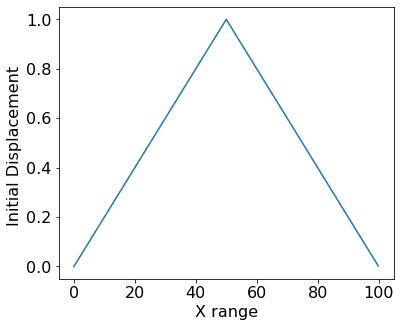

In [2]:
## Initialize the function U(Displacement) and plot it
u_initial = np.zeros_like(x)
for i, j in enumerate(x):
    if (j <= int(L/2)) and (j> 0):
        u_initial[i] = (2*k*j)/L
    if ( j > int(L/2))and j < int(L):
        u_initial[i] = (2*k*(L-j))/L

#Plotting
plt.plot(x,u_initial)
plt.xlabel("X range")
plt.ylabel("Initial Displacement ")

### Wave Equation
#### If u is the function representing the displacement, then
$$ \frac{d^{2}u}{dt^{2}} = c^{2}\frac{d^{2}u}{dx^{2}} $$
#### Taking fourier transform we get
$$ FT(u) = u_{ft}$$
$$ \frac{d^{2}u_{ft}}{dt^{2}} = -w^{2}c^{2}u_{ft}$$
#### Solve the coupled ODEs and take the inverse to get the solution
$$ u_{soln} = IFT(u_{Ft})$$


In [3]:
### Get the fourier transform of the initial temperature 
### Odeint function takes in real numbers as input -> therefore concatenate the real ansd imaginary coeff
def get_fourier_transform(u):
    u_ft = np.fft.fft(u)
    return np.concatenate((u_ft.real,u_ft.imag))

def get_inverse_fourier_transform(u_ft):
    u = np.fft.ifft(u_ft)
    return u.real

def get_complex_num_form(u_ft):
    return u_ft[:N] + (1j)*u_ft[N:]

In [4]:
u_initial[0] = 0
u_initial[N-1] = 0
u_ft_separate = get_fourier_transform(u_initial)

### Initialize the initial velocity -> It is zero here according to the question
v_initial = np.zeros_like(x)
v_ft_separate = get_fourier_transform(v_initial)

### Solve the coupled ODEs
Initial state $$ S = [ u , v ] $$
Here , $$ \frac{ds}{dt} = [\frac{du}{dt}, \frac{dv}{dt}]  = [ v , -w^{2}c^{2}u ] $$

In [12]:
### Get the RHS of the differential equation -> (concatenated format)
### We need to solve coupled ODEs here
def dSdt(S,t,omega,c):
    u = S[0:2000]
    v = S[2000:4000]
    
    #dudt
    dudt_separate = v    
    #dvdt
    u_ft = get_complex_num_form(u)
    dvdt = -c**2 * (np.power(omega,2))*u_ft
    dvdt_separate  =np.concatenate((dvdt.real,dvdt.imag))
    
    return np.concatenate((dudt_separate,dvdt_separate))

### Initial condition (in the form of a list) 
S_0 = np.concatenate((u_ft_separate,v_ft_separate))

### Solve the individual ODEs -> Stored in sol
sol = odeint(dSdt, y0=S_0 , t=t ,args = (omega,c))

In [16]:
sol.shape

(1000, 4000)

In [13]:
### Get the first 2000 entried from sol which corresponds to displacements for 1000 timesteps
usoln_ft_separate = sol[:,0:2000]
u_soln = np.zeros((len(t),len(x)))
for k in range(len(t)):
    usoln_ft = get_complex_num_form(usoln_ft_separate[k,:])
    u_soln[k,:] = get_inverse_fourier_transform(usoln_ft)

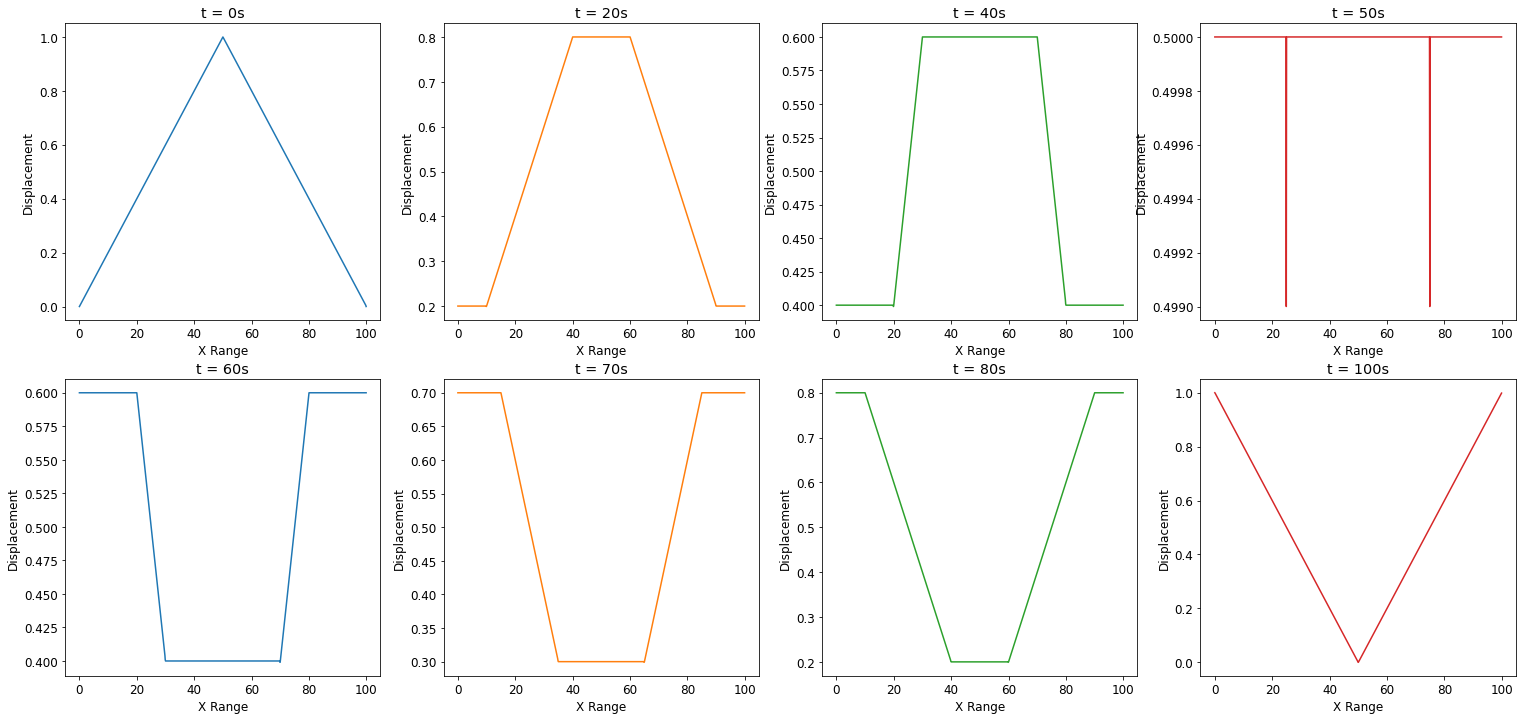

In [14]:
### PLot the solution for different time 
plt.rcParams['figure.figsize'] = [26,12]
plt.rcParams.update({'font.size':12})
fig, axs = plt.subplots(2, 4)
axs[0, 0].plot(x,u_soln[0])
axs[0, 0].set_title('t = 0s')
axs[0, 1].plot(x,u_soln[200], 'tab:orange')
axs[0, 1].set_title('t = 20s')
axs[0, 2].plot(x,u_soln[400], 'tab:green')
axs[0, 2].set_title('t = 40s')
axs[0, 3].plot(x,u_soln[500], 'tab:red')
axs[0, 3].set_title('t = 50s')

axs[1, 0].plot(x,u_soln[600])
axs[1, 0].set_title('t = 60s')
axs[1, 1].plot(x,u_soln[700], 'tab:orange')
axs[1, 1].set_title('t = 70s')
axs[1, 2].plot(x,u_soln[800], 'tab:green')
axs[1, 2].set_title('t = 80s')
axs[1, 3].plot(x,u_soln[999], 'tab:red')
axs[1, 3].set_title('t = 100s')

for ax in axs.flat:
    ax.set(xlabel='X Range', ylabel='Displacement')